In [ ]:
!pip install textblob
!python -m textblob.download_corpora
!pip install vaderSentiment
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
data = pd.read_pickle('admiralbulldog.pkl')
# data['toxic'] = None
# data.to_pickle('admiralbulldog.pkl')
data.head()

,body,channel_id,commenter_id,commenter_type,created_at,fragments,offset,updated_at,video_id,toxic
0,PogU,30816637,133955304,user,2018-06-24T17:18:27.293Z,[{'text': 'PogU'}],17.593,2018-06-24T17:18:27.293Z,277076677,0
1,ma boii,30816637,102631683,user,2018-06-24T17:18:28.326Z,[{'text': 'ma boii'}],18.626,2018-06-24T17:18:28.326Z,277076677,0
2,Chag,30816637,118166941,user,2018-06-24T17:18:29.679Z,[{'text': 'Chag'}],19.979,2018-06-24T17:18:29.679Z,277076677,0
3,PogU PogU PogU PogU PogU,30816637,98113490,user,2018-06-24T17:18:29.861Z,[{'text': 'PogU PogU PogU PogU PogU'}],20.161,2018-06-24T17:18:29.861Z,277076677,0
4,Chag,30816637,134134714,user,2018-06-24T17:18:35.187Z,[{'text': 'Chag'}],25.487,2018-06-24T17:18:35.187Z,277076677,0


In [ ]:
data['toxic'].describe()

count     424
unique      2
top         0
freq      378
Name: toxic, dtype: int64

In [ ]:
# data['toxic'] = data['toxic'][0:400] + [None for i in range(len(data)-400)]
# num_labeled = len(data[data['toxic'] != None])

In [ ]:
for j, row in data.iterrows():
    # if row['toxic'] is None and '@admiral' in row['body']:
    # if row['toxic'] is None and 'fuck' in row['body'].lower():
    if row['toxic'] is None and ' ' in row['body'].lower():
        x = input(row['body'] + ': ')
        if x is 'q':
          break
        data.at[j, 'toxic'] = 1 if x is 't' else 0
        num_labeled += 1

WutFace WutFace WutFace WutFace: g
EBOLA WutFace: g
shit 20k bp lvls?: g
WutFace WTF: g
DansGame DansGame DansGame: g
my bou: g
4 min INTRO, Pagchomp: g
WutFace WutFace: g
SwiftRage SwiftRage SwiftRage: g
Chag PagChomp PogU PogChamp: g
IRL STREAM PogU: g
MI LUL AN: g
PogCena STILL DIDN'T REFRESH PogCena: g
I WAS EATING HYPERDANSGAME: g
WutFace WutFace 🤮: g
I WAS EATING HYPERDANSGAME: g
SYND LUl: g
SYND LUL: g
OMEGALUL G: g
SYND LUL: g
GabeN ?: g
COPYRIGHT BANNED: g
Synd LUL: g
CHINESE ?: g
monkaGIGA BANNED: g
SYND LUL: g
SYND LUL: g
SYND? LUL: g
IRL Stream DansGame: g
waduT TriHard: g
monkaTOS BANNED: g
BANNED monkaGIGA: g
SYND OMEGALUL: g
DONT GET BANNED: g
BANNED OMEGALUL: g
NO SYND PepeHands: g
WRONG TITEL: g
JESUS WHAT ARE YOU DOING: g
IRL Jebaited: g
monkaTOS BANNED: g
purge PogChamp: g
monkaGIGA TOS: g
monkaTOS monkaTOS monkaTOS monkaTOS: g
yall KKona: g
your sellout sir.. monkaS: t
monkaTOS .: g
monkaTOS PepeHands: g
monkaTOS Clap: g
monkaTOS Jebaited: g
monkaTOS monkaHands: g
c

In [ ]:
num_labeled = len(data[data['toxic'].isin([0,1])])
print(f'labeled data points: {num_labeled}')
t_count = len(data[data['toxic'] == True])
print(f'{t_count} of those are likely toxic')
data.to_pickle('admiralbulldog.pkl')

labeled data points: 788
61 of those are likely toxic


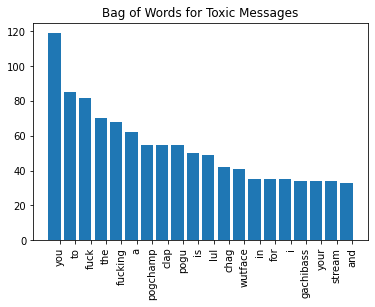

In [ ]:
max_show = 20
toxic_words = []
okay_words = []

for i, row in data[data['toxic'] == True].iterrows():
    sentence = row['body'].lower()
    for word in sentence.split(' '):
        if '@' not in word:
            toxic_words.append(word)

for i, row in data[data['toxic'] == False].iterrows():
    sentence = row['body'].lower()
    for word in sentence.split(' '):
        if '@' not in word:
            toxic_words.append(word)

t_counts = Counter(toxic_words)
t_labels, t_values = zip(*t_counts.items())

ind_sort = np.argsort(t_values)[::-1]

t_labels = np.array(t_labels)[ind_sort][:max_show]
t_values = np.array(t_values)[ind_sort][:max_show]

indexes = np.arange(len(t_labels))

bar_width = 0.35

plt.bar(indexes, t_values)

plt.xticks(indexes + bar_width, t_labels, rotation=90)
plt.title('Bag of Words for Toxic Messages')
plt.show()

In [ ]:
test = [
        'HOY ADMIRAL BOBO WASHED UP IDIOT',
        '@admiralbulldog but you are bald and i have hairs LULW',
        '@admiralbulldog qualify for last place again LUL',
        'shut up chat u fucks',
        'Dude how do you skip eye of the tiger for this garbage song',
]
for s in test:
    blob = TextBlob(s)
    print(blob)
    print(blob.sentiment)
    print()

HOY ADMIRAL BOBO WASHED UP IDIOT
Sentiment(polarity=-0.8, subjectivity=0.8)

@admiralbulldog but you are bald and i have hairs LULW
Sentiment(polarity=0.0, subjectivity=0.0)

@admiralbulldog qualify for last place again LUL
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)

shut up chat u fucks
Sentiment(polarity=0.0, subjectivity=0.0)

Dude how do you skip eye of the tiger for this garbage song
Sentiment(polarity=0.0, subjectivity=0.0)



In [ ]:
analyzer = SentimentIntensityAnalyzer()
for s in test:
    print(s)
    print(analyzer.polarity_scores(s))
    print()

HOY ADMIRAL BOBO WASHED UP IDIOT
{'neg': 0.344, 'neu': 0.417, 'pos': 0.24, 'compound': -0.25}

@admiralbulldog but you are bald and i have hairs LULW
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

@admiralbulldog qualify for last place again LUL
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

shut up chat u fucks
{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

Dude how do you skip eye of the tiger for this garbage song
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



In [ ]:
def remove_punctuation(text):
    return "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"', '@'))

clean_data = data[data['toxic'].isin([0,1])]
clean_data['text'] = clean_data.apply(lambda row: remove_punctuation(row['body']), axis=1)
clean_data = clean_data.drop(['body', 'channel_id', 'commenter_id', 'commenter_type', 'created_at', 'fragments',	'offset', 'updated_at', 'video_id'], axis=1)

print(len(clean_data))
clean_data.head()

788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,toxic,text
0,0,PogU
1,0,ma boii
2,0,Chag
3,0,PogU PogU PogU PogU PogU
4,0,Chag


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(clean_data['text'], clean_data['toxic'], test_size=0.15)

# display(clean_data['toxic'].describe())
# display(clean_data)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

lr = LogisticRegression()
lr.fit(train_matrix, y_train)
pred = lr.predict(test_matrix)

result = X_test
result['class'] = pred

sk.metrics.f1_score(y_test, pred)

0.5714285714285715